In [1]:
from ego_solver import EGO
import numpy as np
from matplotlib import colors, ticker, cm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import time
%matplotlib inline
pal = sns.color_palette('Dark2', n_colors=2, desat=.6)
sns.set_palette(pal)
sns.set_context(context='paper', font_scale=1.5)
sns.set_style('ticks')

sig_scale = np.array([0.01, 0.1, 1., 10.])
alpha_set = np.array([0.01, 0.1, 1., 10.])
# alpha_set = np.array([1e-5, 1e-4, 1e-3, 1e-2])

# data = np.loadtxt('all_10_trials_branin.txt').reshape((30,4,4))

c_m = sns.cubehelix_palette(as_cmap=True, light=1)

norm = colors.LogNorm(vmin=10., vmax=1e5)
s_m = cm.ScalarMappable(cmap=c_m, norm=norm)
#     norm.autoscale(X)
s_m.set_array([])


import matplotlib.colors as colors
import matplotlib.cm

def heat_plot(data, sig, ax=None):
    if ax is None:
        f, ax = plt.subplots( figsize=(12,4))
    X = -data.mean(axis=0)
    print np.min(X), np.max(X)
    
    
    
    hmap = sns.heatmap(X,
                xticklabels=alpha_set, yticklabels=sig_scale, cmap=c_m, 
               robust=False, annot=True, ax=ax, square=True, cbar=False,
                annot_kws={"size": 11}, fmt='.4g', norm=norm, vmin=10., vmax=1e5)
    ax.set_xlabel(r'$\alpha$')
    
#     ax[0].set_title(r'$\mathrm{E}[-\log {\cal L}(\Sigma^{-1}_{test}|\Sigma^{-1},\alpha)]$')

#     for y in range(data.mean(axis=0).shape[0]):
#         for x in range(data.mean(axis=0).shape[1]):
#             ax.text(x + 0.5, y + 0.2, '[ {:.1e} ]'.format( data.std(axis=0)[-y-1, x]),
#                      horizontalalignment='center',
#                      verticalalignment='center', color='gray'
#                      )
    
    # f.suptitle('BO Paramter estimation for Branin \n True $\Sigma^{-1}=0.01$ over 30 Trials', 
    #            y=1.1, fontsize=12)
    ax.set_title('$\Lambda^*='+str(sig)+'$ over 30 Trials', 
               y=1.03, fontsize=12)
# cbar_ax = f.axes[-1]
# cbar_ax.set_ylabel('-log likelihood')
# plt.showw()
names=['0.01','0.1','1.0','10.0']





# f,ax = plt.subplots(ncols=4, figsize=(17,6))
# for n,i in enumerate(names):
#     data = np.loadtxt('./branin_ML/all'+i+'branin_11iter_9init.txt').reshape((30,4,4))
#     heat_plot(data, sig_scale[n], ax=ax[n])
# title=r'$\mathrm{E}[-\log {\cal L}(\alpha,\Lambda;\zeta,s_0)]$'+\
#                ' for Rosenbrock 6D function'

# f.get_axes()[0].annotate(title, (0.5, 0.85), 
#                             xycoords='figure fraction', ha='center', 
#                             fontsize=16
#                             )
# f.get_axes()[0].set_ylabel(r'$\Lambda$')
# # f.colorbar(s_m, orientation='horizontal', ax = f.get_axes(), fraction=0.075)

# plt.subplots_adjust(top=0.8, bottom=.26)
# plt.subplots_adjust()
# # plt.tight_layout()
# # f.colorbar()

# # approximate lhs and random likelihood (deprecated)
# lhs_like = np.vectorize(lambda n,p,l: p*np.log(np.math.factorial(n)) + p*n*np.log(l/float(n)))
# uni_like = np.vectorize(lambda n,p,l: n*p*np.log(l))

# #which samples to use for true data
# inits = np.arange(1,20)

def get_L(lam, iters):
    inits = np.arange(1,iters)
    Ls = np.zeros_like(inits)
    for n,i in enumerate(inits):
        fname='./branin_ML/sample_study/all{}branin_{:d}iter_{:d}init.txt'.format(lam,iters,i)
        data = np.loadtxt(fname).reshape((30,4,4))
        Ls[n] = -data.mean(axis=0).min()
    return Ls
# plt.plot(inits,lhs_like(inits,2,15))
# plt.plot(inits,uni_like(inits,2,15))
# print get_L(10.)
# pal = sns.color_palette('Dark2', n_colors=4, desat=.6)
# sns.set_palette(pal)

# for nam in names:
#     plt.plot(inits, get_L(nam, 20), label=r'$\Lambda^*={}$'.format(nam))
# plt.ylabel(r'$\min_{\Lambda,\alpha}(-\log {\cal L}(\alpha,\Lambda;\zeta,s_0))$')
# plt.xlabel('No. initialization samples ')
# plt.axvline(10, color='k',ls='--',label='True no. init')
# plt.title(r'log-ikelihood of $(\Lambda,\alpha)$ on 20 samples'+'\n')
# plt.legend(loc=0)
# plt.tight_layout()

from scipy.spatial.distance import pdist, cdist, squareform
from pyDOE import lhs
from scipy.misc import logsumexp
import scikits.bootstrap as boot  


# file_address = 'solution_obj_name_branin_maxiter_100_repeat_30.pkl'
# with open(file_address, 'r') as f:
#     dat = pickle.load(f)
# f,axes = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
# for n,ax in enumerate(axes.flatten()):
#     true_lam = n
# ## dat['solution'][true_lam, coor_or_ei, no_samples]
#     solution_X = np.dstack([i[true_lam][0][:40,:].T for i in dat['solution']])
#     solution_y = np.dstack([i[true_lam][1][:40] for i in dat['solution']])

#     print solution_X.shape, solution_y.shape
#     # print solution[0,0,1].shape
#     # solution_X[1,:10,0]

#     # %matplotlib inline

#     ## solution_X[dimension, sample, trial]
#     # plt.plot(solution_X[0,:10,0],solution_X[1,:10,0], marker='o', ls='--');



#     # print pdist(solution_X[:,:2,0].T)
#     E_true = np.array([[pdist(solution_X[:,:i,j].T).min() for i in range(5,40)] for j in range(30)])
#     # solution_X[:][0].shape
#     # dat['solution']
#     print E_true.shape
#     # plt.plot(range(5,40), np.exp(-E_true).T, color='k', alpha=.4, ls=':')

#     all_p = np.zeros((30,35))
#     alpha=100.
#     for trial in range(30):
#         t_samp = range(5,40)
#         p = np.zeros_like(t_samp) # initialize
#         for n,tr in enumerate(range(5,40)):
#             true_set = solution_X[:,:tr, 0].T
#             bounds = np.array([[-5, 10], [0, 15]])  # for branin
#         #     samples = lhs(2, 100) 
#             samples = np.random.uniform(size=(1000,2))
#             samples = samples*(bounds[:, 1]-bounds[:, 0])+bounds[:, 0]
#             E_samp = (cdist(true_set[:-1],samples).min(axis=0))
#             log_prob = alpha*E_true[trial,n] - logsumexp(alpha*np.append(E_samp.T, E_true[trial,n]).T)
#             p[n] = -log_prob
#         ax.plot(t_samp, p, color='k', alpha=.4, ls=':')
#         all_p[trial,:]=p
#     lo_hi = np.zeros((35,2))
#     for n,i in enumerate(range(5,40)):
#         lo_hi[n] = boot.ci(all_p[:,n], np.mean, alpha=.05)
#     # print lo_hi
#     ax.fill_between(range(5,40), lo_hi[:,0],lo_hi[:,1], alpha=.4)
# print tuple([i for i in np.exp(-E_true)])

# lo_hi = np.zeros((35,2))
# for n,i in enumerate(range(5,40)):
#     lo_hi[n] = boot.ci(np.exp(-E_true[:,n]), np.mean, alpha=.05)
# # print lo_hi
# plt.fill_between(range(5,40), lo_hi[:,0],lo_hi[:,1], alpha=.4)

In [2]:
from sklearn.preprocessing import MinMaxScaler
def cuml_like(arr1, arr2):
#     arr1=MinMaxScaler().fit_transform(arr1.astype(float).reshape(-1,1))
#     arr2=MinMaxScaler().fit_transform(arr2.astype(float).reshape(-1,1))
    if arr1.size!=arr2.size:
        raise Exception('must be equal-sized arrays arr1 and arr2')
    new = np.zeros_like(arr1)
    for n in range(new.size):
        new[n] = arr1[:n+1].sum()+arr2[n+1:].sum()
    return new

In [3]:
file_address = 'solution_obj_name_branin_maxiter_100_repeat_30.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)

names=['0.01','0.1','1.0','10.0']

In [4]:
#which samples to use for true data
no_iters=20
n_trial = 30

def get_Ls(lam, iters):
    no_iters=20
    inits = np.arange(2,iters)
    Ls = np.zeros((inits.size,4))
    for n,i in enumerate(inits):
        fname='./branin_ML/sample_study_MAX_trial30_new/all{}branin_{}iter_{:d}init.txt'.format(lam,no_iters,i)
        data = np.loadtxt(fname).reshape((n_trial,4,4))
        Ls[n] = -data.mean(axis=0).max(axis=1)
    return Ls
# plt.plot(inits,lhs_like(inits,2,15))
# plt.plot(inits,uni_like(inits,2,15))
# print get_L(10.)
pal = sns.color_palette('Dark2', n_colors=4, desat=.6)
sns.set_palette(pal)
# print get_Ls('0.01', no_iters).shape

# plt.plot(inits, get_Ls('0.01', no_iters))
# plt.ylabel(r'$\min_{\Lambda,\alpha}(-\log {\cal L}(\alpha,\Lambda;\zeta,s_0))$')
# plt.xlabel('No. initialization samples ')
# plt.axvline(10, color='k',ls='--',label='True no. init')
# plt.title(r'log-ikelihood of $(\Lambda,\alpha)$ on 20 samples'+'\n')
# plt.legend([r'$\Lambda={}$'.format(nam) for nam in names], loc=0)
# plt.tight_layout()

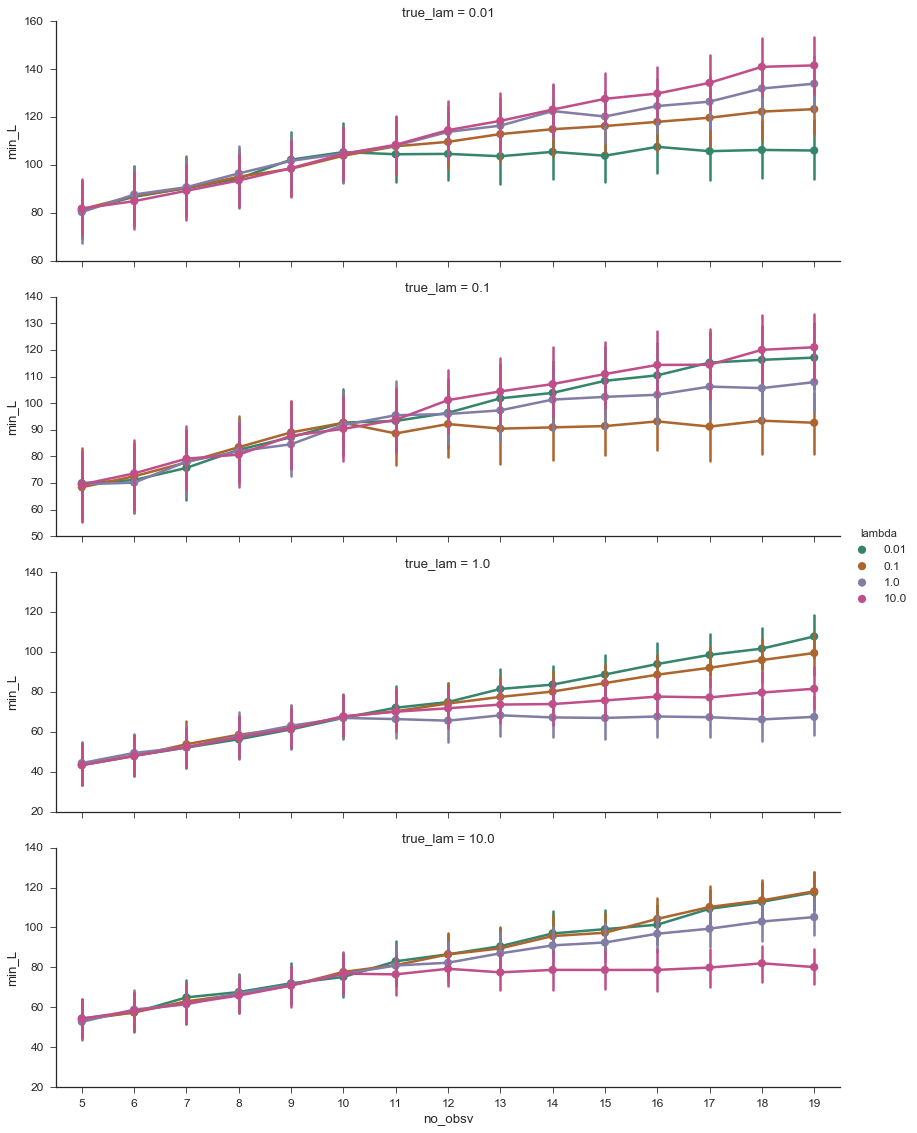

In [6]:
from tqdm import tnrange, tqdm_notebook
file_address = 'solution_obj_name_branin_maxiter_100_repeat_30.pkl'
with open(file_address, 'r') as f:
    dat = pickle.load(f)

names=['0.01','0.1','1.0','10.0']

df = pd.DataFrame()



# f, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
for lam_no in tnrange(4, desc='true lambda loop'):
    all_df = pd.DataFrame()
    for no_iters in tnrange(5,20, desc='observation no loop'):
        mins_df = pd.DataFrame(index=np.arange(n_trial),columns=names)
#         no_iters = 20
        true_lam = lam_no
        l_ego = get_Ls(names[true_lam], no_iters)
#         ax.set_title('$\Lambda^*={}$\n'.format(names[true_lam]))

        ## dat['solution'][true_lam, coor_or_ei, no_samples]
        solution_X = np.dstack([i[true_lam][0][:no_iters,:].T for i in dat['solution']])
        solution_y = np.dstack([i[true_lam][1][:no_iters] for i in dat['solution']])

        E_true = np.array([[pdist(solution_X[:,:i,j].T).min() for i in range(2,40)] for j in range(n_trial)])

        bounds = np.array([[-5, 10], [0, 15]])  # for branin
        t_samp = range(2,no_iters)
        p = np.zeros_like(t_samp)+0.0 # initialize
        alpha = 10.0
        # for test in range(10):
        colors=['b','k','g','r']
        for j in range(4):  # the test-lambda
            mins = []  # for min-seeking statistics
            for trial in range(n_trial):
                for n,tr in enumerate(t_samp):
                    true_set = solution_X[:,:tr, 0].T
                    bounds = np.array([[-5, 10], [0, 15]])  # for branin
                #     samples = lhs(2, 100) 
                    samples = np.random.uniform(size=(100,2))
                    samples = samples*(bounds[:, 1]-bounds[:, 0])+bounds[:, 0]
                    E_samp = (cdist(true_set[:-1],samples).min(axis=0))
                    log_prob = alpha*E_true[trial,n] - logsumexp(alpha*np.append(E_samp.T, E_true[trial,n]).T)
                    p[n] = -log_prob

        #         ax.plot(t_samp,p+l_ego, color='k', ls=':')  # for just L_ini
                
                combined=cuml_like(p,l_ego[:,j]);
        #         ax.plot(t_samp,combined, color='k', ls=':')  # for combined
    #             ax.scatter(t_samp[np.argmin(combined, axis=0)], np.min(combined,axis=0), color=colors[j])
        #         ax.axvline(x=t_samp[np.argmin(combined)], alpha=.2, color='r')
                mins+=[np.min(combined)]
            #     plt.scatter(*samples.T)
    #         sns.distplot(mins, kde=False, bins=t_samp, hist_kws={'align':'left'}, ax=ax)
    #         print len(mins)
            mins_df[names[j]]=mins
        mins_df = pd.melt(mins_df, value_vars=names, var_name='lambda',value_name='min_L')
        mins_df['no_obsv']=no_iters
        all_df = pd.concat([all_df, mins_df])
    #         sns.swarmplot( data=mins, ax=ax)
        # plt.plot(t_samp,p)

#     all_df = pd.melt(all_df, value_vars=names+['no_obsv'], var_name='lambda',value_name='mins')
    all_df['true_lam'] = names[lam_no]
#     print all_df.head()
    
    df = pd.concat([df,all_df])
#         sns.swarmplot(data=mins_df, x='lambda',y='mins', ax=ax)

sns.factorplot(data=df, x='no_obsv', y='min_L', hue='lambda', row='true_lam',
               kind='point', aspect=3, sharey=False)
# plt.tight_layout()

In [7]:
df

,lambda,min_L,no_obsv,true_lam
0,0.01,40.367622,5,0.01
1,0.01,117.949550,5,0.01
2,0.01,109.152788,5,0.01
3,0.01,40.063267,5,0.01
4,0.01,71.550921,5,0.01
5,0.01,31.035360,5,0.01
6,0.01,102.114885,5,0.01
7,0.01,135.939490,5,0.01
8,0.01,62.434051,5,0.01
9,0.01,42.827983,5,0.01


In [ ]:
all_df.loc[0].min_L

In [ ]:
p

In [ ]:
alpha*E_true[trial,n] - logsumexp(alpha*np.append(E_samp.T, E_true[trial,n]).T)

In [ ]:
E_samp

In [ ]:
l_ego[:,j]

In [ ]:
p

In [ ]:
l_ego[:,j]

In [ ]:
get_Ls('0.01', 11)

In [15]:
a = np.array([1,2,3])

In [31]:
np.hstack((a,[np.nan]*3))

array([  2.,   3.,   4.,  nan,  nan,  nan])

In [20]:
a

array([2, 3, 4])